# Multivariate Analysis

Loading the cleaned dataset

In [1834]:
import pandas as pd
import matplotlib.pyplot as plt

In [1835]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [1836]:
lcdci_df = pd.read_csv('lcdci.csv')
lcdci_df.head()

,country,forest_area,freshwater,gdp_per_capita,paris_agreement,unfccc,hdi,cooking_clean_fuel_and_technologies_access,renewable_energy_consumption,co2_emissions,methane_emissions,nitrous_oxide_emissions
0,Afghanistan,1208.44,47.2,355.777826,1.0,2002.0,0.462,35.4,17.6,8709.470000,16222.035960,4863.386801
1,Albania,788.90,26.9,6377.203096,1.0,1994.0,0.789,83.7,44.6,4383.200000,2692.195886,1015.186729
2,Algeria,1949.00,11.2,3700.314697,1.0,1993.0,0.745,99.7,0.2,161563.000000,86543.923620,12578.747600
3,Andorra,16.00,0.3,42072.319423,1.0,2011.0,0.884,100.0,21.9,448.884399,53.600959,1.758811
4,Angola,66607.38,148.0,1927.474078,1.0,2000.0,0.591,50.0,61.0,19814.500000,32703.238110,17757.867840


In [1837]:
lcdci_df.describe()

/Users/luanakimley/.pyenv/versions/3.11.5/lib/python3.11/site-packages/IPython/core/displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


,forest_area,freshwater,gdp_per_capita,paris_agreement,unfccc,hdi,cooking_clean_fuel_and_technologies_access,renewable_energy_consumption,co2_emissions,methane_emissions,nitrous_oxide_emissions
count,191.000000,191.000000,191.000000,191.0,191.000000,191.000000,191.000000,191.000000,1.910000e+02,1.910000e+02,191.000000
mean,21195.601152,225.070084,15914.553221,1.0,1995.324607,0.721128,67.717765,32.454450,1.700404e+05,4.342176e+04,15796.222516
std,78820.281307,670.359996,25465.134360,0.0,3.673428,0.155084,37.065913,27.724828,8.742493e+05,1.277767e+05,50037.535757
min,0.000000,0.000000,221.157803,1.0,1992.000000,0.380000,0.000000,0.000000,6.600000e+00,2.588257e+00,0.000000
25%,374.750000,6.100000,2067.717770,1.0,1993.500000,0.601000,35.300000,10.200000,2.564260e+03,2.364673e+03,585.030245
50%,2677.090000,28.600000,5408.045352,1.0,1994.000000,0.739000,86.800000,23.800000,1.247730e+04,9.801473e+03,3544.205981
75%,12463.820000,125.250000,17866.513861,1.0,1995.000000,0.841000,100.000000,50.000000,6.518725e+04,3.119410e+04,12491.469910
max,815311.600000,5661.000000,197504.548936,1.0,2015.000000,0.967000,100.000000,96.200000,1.094469e+07,1.186285e+06,536920.210300


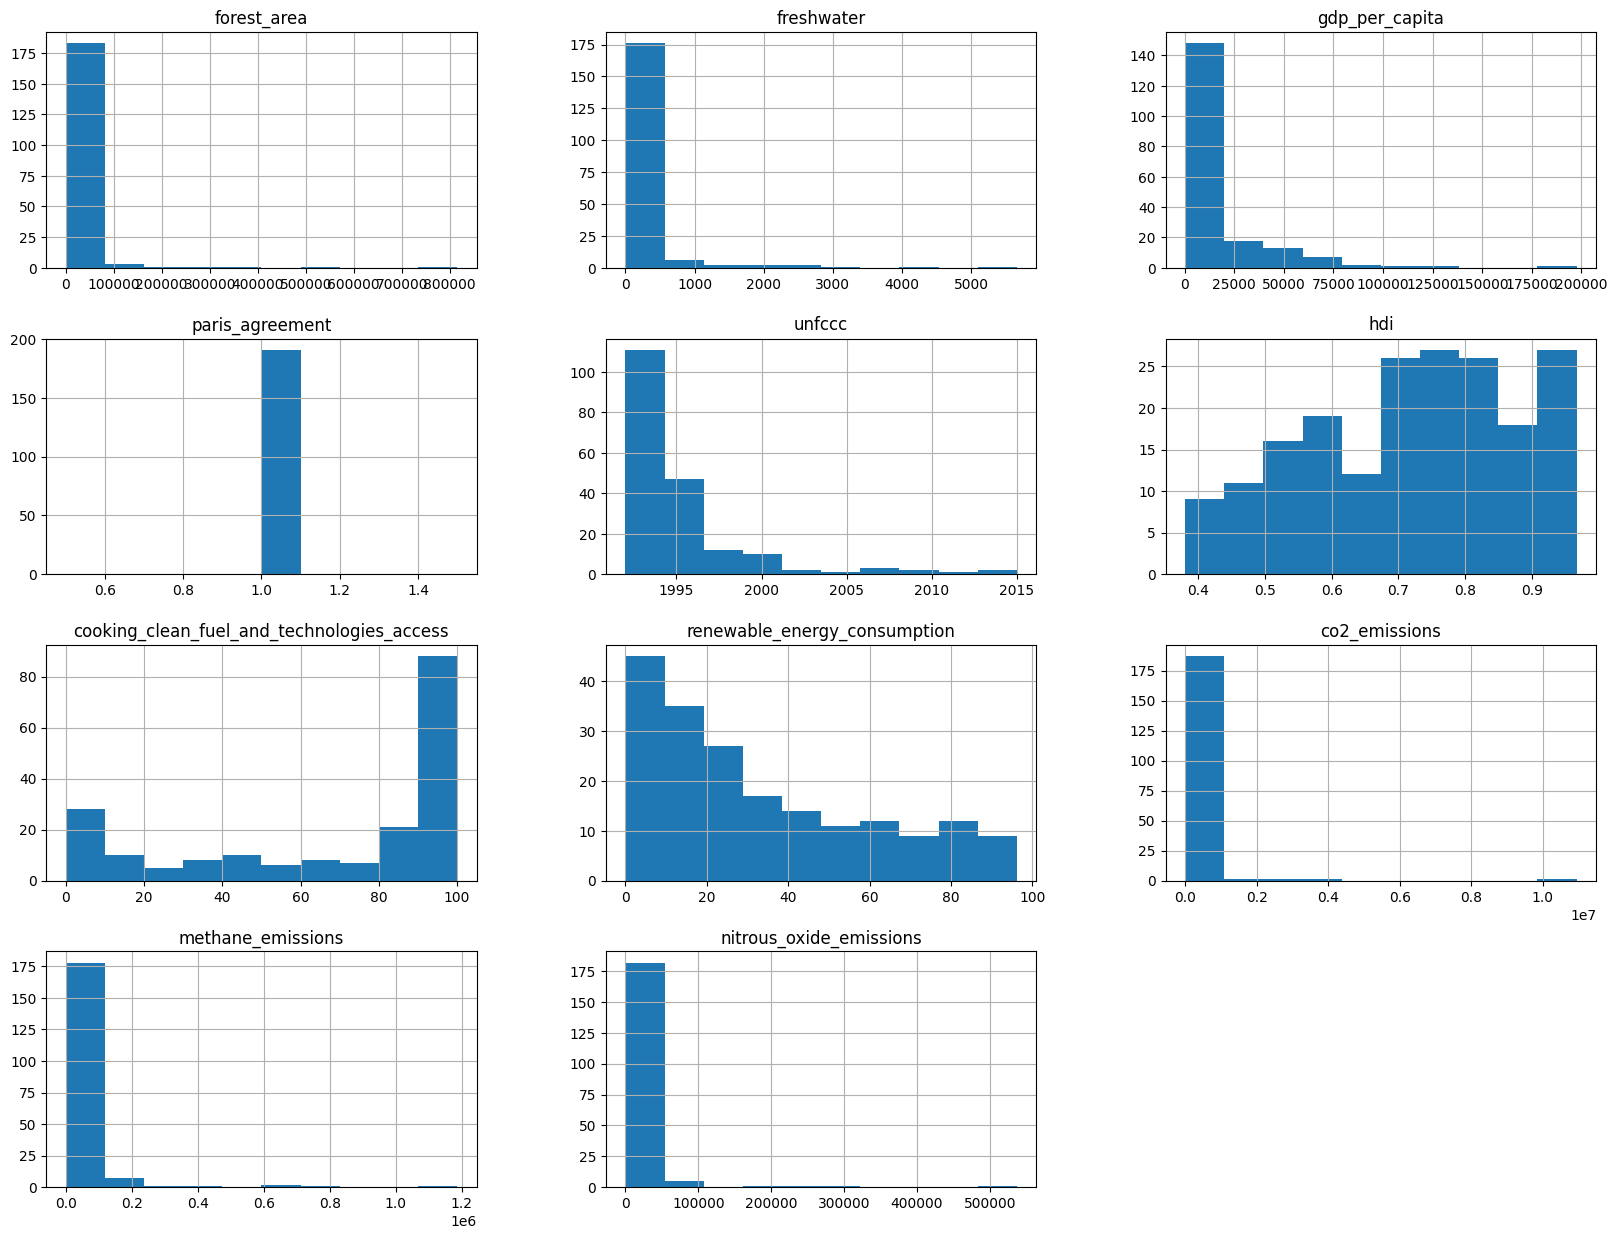

In [1838]:
lcdci_df.hist(figsize=(20, 15))  # Histograms of all columns
plt.show()

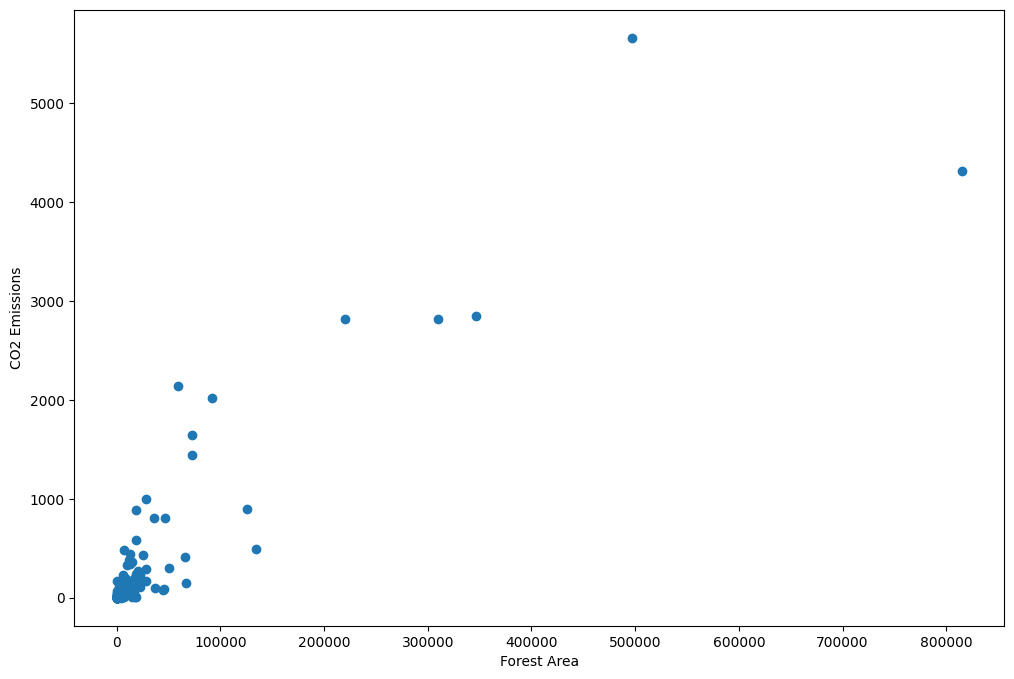

In [1876]:
plt.figure(figsize=(12, 8)) # Increase width and height 
plt.scatter(lcdci_df['forest_area'], lcdci_df['freshwater'])
plt.xlabel('Forest Area')
plt.ylabel('CO2 Emissions')
plt.show()

# Summary Statistics by Country 
if 'country' in lcdci_df.columns:
    lcdci_df.groupby('country').describe()


In [1839]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

In [1877]:
lcdci_df_dropped = lcdci_df.drop('country', axis=1)
lcdci_df_dropped.head()

,forest_area,freshwater,gdp_per_capita,paris_agreement,unfccc,hdi,cooking_clean_fuel_and_technologies_access,renewable_energy_consumption,co2_emissions,methane_emissions,nitrous_oxide_emissions,cluster
0,1208.44,47.2,355.777826,1.0,2002.0,0.462,35.4,17.6,8709.470000,16222.035960,4863.386801,1
1,788.90,26.9,6377.203096,1.0,1994.0,0.789,83.7,44.6,4383.200000,2692.195886,1015.186729,0
2,1949.00,11.2,3700.314697,1.0,1993.0,0.745,99.7,0.2,161563.000000,86543.923620,12578.747600,0
3,16.00,0.3,42072.319423,1.0,2011.0,0.884,100.0,21.9,448.884399,53.600959,1.758811,0
4,66607.38,148.0,1927.474078,1.0,2000.0,0.591,50.0,61.0,19814.500000,32703.238110,17757.867840,1


In [1841]:
scaler = StandardScaler()
lcdci_df_scaled = scaler.fit_transform(lcdci_df_dropped)

In [1842]:
pca = PCA() 

In [1843]:
lcdci_df_pca = pca.fit_transform(lcdci_df_scaled)

In [1844]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([3.91348584e-01, 2.68103250e-01, 1.05579364e-01, 9.32484461e-02,
       8.04689452e-02, 2.92460753e-02, 1.26899924e-02, 9.71891560e-03,
       7.11782115e-03, 2.47860617e-03, 5.24239945e-34])

In [1845]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
per_var

array([39.1, 26.8, 10.6,  9.3,  8. ,  2.9,  1.3,  1. ,  0.7,  0.2,  0. ])

In [1846]:
loading_scores_pca1 = pd.Series(np.round(pca.components_[0] * 100), index=lcdci_df_dropped.columns.tolist())
loading_scores_pca1

forest_area                                   38.0
freshwater                                    41.0
gdp_per_capita                                 9.0
paris_agreement                               -0.0
unfccc                                       -10.0
hdi                                           16.0
cooking_clean_fuel_and_technologies_access    15.0
renewable_energy_consumption                 -11.0
co2_emissions                                 42.0
methane_emissions                             48.0
nitrous_oxide_emissions                       45.0
dtype: float64

In [1847]:
loading_scores_pca2 = pd.Series(np.round(pca.components_[1] * 100), index=lcdci_df_dropped.columns.tolist())
loading_scores_pca2

forest_area                                   11.0
freshwater                                    12.0
gdp_per_capita                               -39.0
paris_agreement                                0.0
unfccc                                         9.0
hdi                                          -55.0
cooking_clean_fuel_and_technologies_access   -53.0
renewable_energy_consumption                  43.0
co2_emissions                                  9.0
methane_emissions                             14.0
nitrous_oxide_emissions                       15.0
dtype: float64

In [1848]:
loading_scores_pca3 = pd.Series(np.round(pca.components_[2] * 100), index=lcdci_df_dropped.columns.tolist())
loading_scores_pca3

forest_area                                  -30.0
freshwater                                   -26.0
gdp_per_capita                               -28.0
paris_agreement                               -0.0
unfccc                                        69.0
hdi                                           -6.0
cooking_clean_fuel_and_technologies_access    10.0
renewable_energy_consumption                 -38.0
co2_emissions                                 28.0
methane_emissions                             13.0
nitrous_oxide_emissions                       19.0
dtype: float64

In [1849]:
loading_scores_pca4 = pd.Series(np.round(pca.components_[3] * 100), index=lcdci_df_dropped.columns.tolist())
loading_scores_pca4

forest_area                                   53.0
freshwater                                    42.0
gdp_per_capita                               -13.0
paris_agreement                               -0.0
unfccc                                        51.0
hdi                                            2.0
cooking_clean_fuel_and_technologies_access     8.0
renewable_energy_consumption                 -14.0
co2_emissions                                -38.0
methane_emissions                            -11.0
nitrous_oxide_emissions                      -29.0
dtype: float64

In [1850]:
loading_scores_pca5 = pd.Series(np.round(pca.components_[4] * 100), index=lcdci_df_dropped.columns.tolist())
loading_scores_pca5

forest_area                                   -3.0
freshwater                                    -4.0
gdp_per_capita                                71.0
paris_agreement                               -0.0
unfccc                                        49.0
hdi                                           11.0
cooking_clean_fuel_and_technologies_access   -17.0
renewable_energy_consumption                  45.0
co2_emissions                                  8.0
methane_emissions                              1.0
nitrous_oxide_emissions                        7.0
dtype: float64

In [1851]:
loading_scores_pca6 = pd.Series(np.round(pca.components_[5] * 100), index=lcdci_df_dropped.columns.tolist())
loading_scores_pca6

forest_area                                   16.0
freshwater                                    -9.0
gdp_per_capita                                40.0
paris_agreement                                0.0
unfccc                                       -10.0
hdi                                          -28.0
cooking_clean_fuel_and_technologies_access   -54.0
renewable_energy_consumption                 -64.0
co2_emissions                                  4.0
methane_emissions                              3.0
nitrous_oxide_emissions                      -10.0
dtype: float64

In [1852]:
sorted_loading_scores = loading_scores_pca1.abs().sort_values(ascending=False)
top_10_indicators = sorted_loading_scores[0:11].index.values
top_10_indicators

array(['methane_emissions', 'nitrous_oxide_emissions', 'co2_emissions',
       'freshwater', 'forest_area', 'hdi',
       'cooking_clean_fuel_and_technologies_access',
       'renewable_energy_consumption', 'unfccc', 'gdp_per_capita',
       'paris_agreement'], dtype=object)

Text(0.5, 1.0, 'Scree Plot')

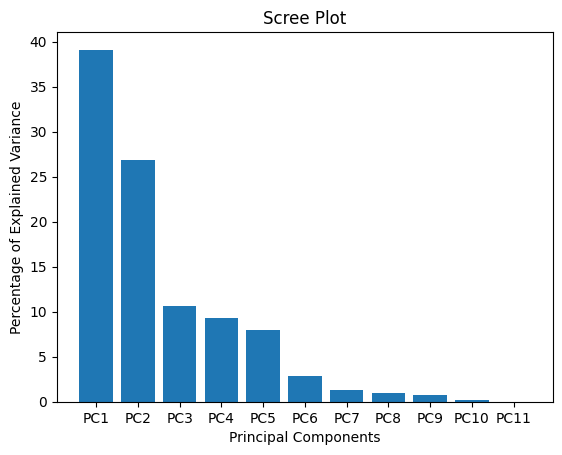

In [1853]:
labels = ['PC' + str(i) for i in range(1, len(per_var)+1)]
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel("Percentage of Explained Variance")
plt.xlabel("Principal Components")
plt.title("Scree Plot")

In [1854]:
from sklearn.cluster import KMeans

In [1855]:
selected_components = lcdci_df_pca[:, :6]

In [1856]:
num_clusters = 5

In [1857]:
kmeans = KMeans(n_clusters=num_clusters, random_state=20)
clusters = kmeans.fit_predict(selected_components)

Take first 6-7 variables and do clustering based on that

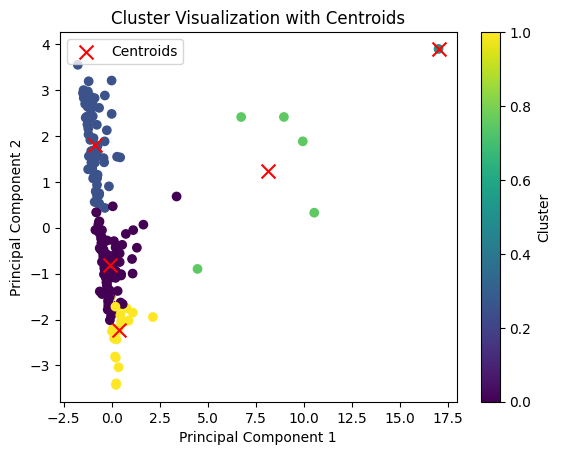

In [1858]:
plt.scatter(selected_components[:, 0], selected_components[:, 1], c=clusters, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=100, c='red', label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Cluster Visualization with Centroids')
plt.legend()
plt.colorbar(label='Cluster')
plt.show()

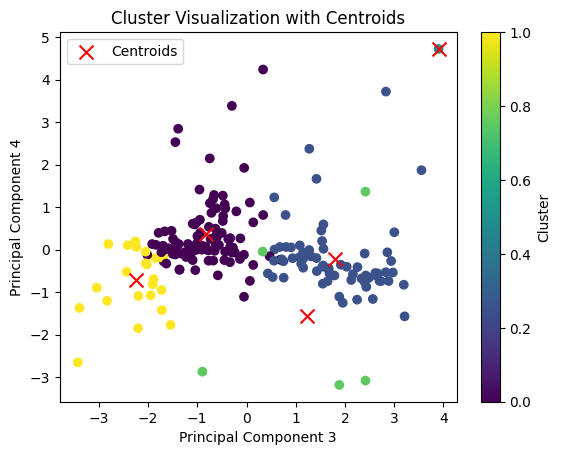

In [1880]:
plt.scatter(selected_components[:, 1], selected_components[:, 2], c=clusters, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], marker='x', s=100, c='red', label='Centroids')
plt.xlabel('Principal Component 3')
plt.ylabel('Principal Component 4')
plt.title('Cluster Visualization with Centroids')
plt.legend()
plt.colorbar(label='Cluster')
plt.show()

In [1859]:
lcdci_df['cluster'] = clusters 
grouped_df = lcdci_df.groupby('cluster')
grouped_df.describe()

forest_area                                                       \
              count           mean            std        min         25%   
cluster                                                                    
0              94.0    8066.965106   16483.234629       0.46     150.630   
1              67.0   11073.114328   19312.639166       1.18    1067.480   
2               1.0  219978.180000            NaN  219978.18  219978.180   
3               5.0  408162.860000  273824.097267   72160.00  309795.000   
4              24.0   11973.915000   27391.862660       0.00     272.975   

                                           freshwater               \
                50%         75%        max      count         mean   
cluster                                                              
0          1932.505    7123.705   92133.20       94.0   137.729943   
1          3611.090   14699.130  126155.24       67.0   106.729490   
2        219978.180  219978.180  219978.18        1.0  2812.900000   
3        346928.100  496619.600  815311.60        5.0  3417.400000   
4          2229.555   11609.250  134005.10       24.0   124.624817   

                                                                      \
                 std     min      25%          50%       75%     max   
cluster                                                                
0         367.135558     0.0     2.50    16.392841    58.075  2145.0   
1         190.736110     0.3    10.20    39.000000   121.300  1002.8   
2                NaN  2812.9  2812.90  2812.900000  2812.900  2812.9   
3        1612.582649  1446.0  2818.00  2850.000000  4312.000  5661.0   
4         146.753286     0.1     9.75    59.950000   173.875   492.0   

        gdp_per_capita                                            \
                 count          mean           std           min   
cluster                                                            
0                 94.0  11801.757994   9190.156583    420.622705   
1                 67.0   1946.539485   1654.407598    221.157803   
2                  1.0  12617.505104           NaN  12617.505104   
3                  5.0  29040.327009  30385.932470   2238.127142   
4                 24.0  68419.880339  35985.218362  35142.264267   

                                                                  \
                  25%           50%           75%            max   
cluster                                                            
0         4864.080078   8418.406939  17425.236925   42072.319423   
1          760.929119   1577.470841   2538.048323    8635.797144   
2        12617.505104  12617.505104  12617.505104   12617.505104   
3         7696.784830  12532.050781  52515.199835   70219.472454   
4        49214.755269  56122.880499  71379.011158  197504.548936   

        paris_agreement                                    unfccc  \
                  count mean  std  min  25%  50%  75%  max  count   
cluster                                                             
0                  94.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   94.0   
1                  67.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   67.0   
2                   1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0    1.0   
3                   5.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0    5.0   
4                  24.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   24.0   

                                                                          hdi  \
                mean       std     min     25%     50%      75%     max count   
cluster                                                                         
0        1995.574468  4.025428  1992.0  1994.0  1994.0  1995.75  2015.0  94.0   
1        1995.701493  3.729550  1992.0  1994.0  1995.0  1995.50  2014.0  67.0   
2        1993.000000       NaN  1993.0  1993.0  1993.0  1993.00  1993.0   1.0   
3        1993.000000  1.000000  1992.0  1992.0  1993.0  1994.00  1994.0   5.0   
4        1993.875000  1.261900  1992.0  1993.0  199

In [1860]:
cluster_0_countries = lcdci_df[lcdci_df['cluster'] == 0] 
cluster_0_countries


,country,forest_area,freshwater,gdp_per_capita,paris_agreement,unfccc,hdi,cooking_clean_fuel_and_technologies_access,renewable_energy_consumption,co2_emissions,methane_emissions,nitrous_oxide_emissions,cluster
1,Albania,788.90,26.900000,6377.203096,1.0,1994.0,0.789,83.700000,44.6,4383.200000,2692.195886,1015.186729,0
2,Algeria,1949.00,11.200000,3700.314697,1.0,1993.0,0.745,99.700000,0.2,161563.000000,86543.923620,12578.747600,0
3,Andorra,16.00,0.300000,42072.319423,1.0,2011.0,0.884,100.000000,21.9,448.884399,53.600959,1.758811,0
5,Antigua and Barbuda,8.12,0.100000,17178.543716,1.0,1993.0,0.826,100.000000,0.7,474.600000,204.865822,11.763473,0
6,Argentina,28573.00,292.000000,10650.860460,1.0,1994.0,0.849,99.900000,9.8,154535.900000,131035.689400,51061.498890,0
7,Armenia,328.47,6.900000,4972.783204,1.0,1993.0,0.786,98.400000,8.4,6746.600000,2319.921617,1173.579946,0
10,Azerbaijan,1131.77,8.100000,5408.045352,1.0,1995.0,0.760,98.300000,1.2,34305.000000,15733.131010,4793.554747,0
11,Bahamas,509.86,0.700000,28260.432551,1.0,1994.0,0.820,100.000000,1.4,2456.000000,223.179220,33.819566,0
12,Bahrain,0.70,0.000000,26850.003392,1.0,1994.0,0.888,100.000000,0.0,32470.200000,17641.434030,171.638398,0
14,Barbados,6.30,0.100000,17507.467994,1.0,1994.0,0.809,100.000000,4.6,1096.070000,2359.570952,38.478740,0


In [1861]:
cluster_1_countries = lcdci_df[lcdci_df['cluster'] == 1] 
cluster_1_countries

,country,forest_area,freshwater,gdp_per_capita,paris_agreement,unfccc,hdi,cooking_clean_fuel_and_technologies_access,renewable_energy_consumption,co2_emissions,methane_emissions,nitrous_oxide_emissions,cluster
0,Afghanistan,1208.44,47.200000,355.777826,1.0,2002.0,0.462000,35.4,17.6,8709.470,16222.035960,4863.386801,1
4,Angola,66607.38,148.000000,1927.474078,1.0,2000.0,0.591000,50.0,61.0,19814.500,32703.238110,17757.867840,1
13,Bangladesh,1883.40,105.000000,2457.924039,1.0,1994.0,0.670000,26.5,28.0,85493.100,88903.997170,28076.846460,1
18,Benin,3135.15,10.300000,1360.911474,1.0,1994.0,0.504000,4.6,46.2,7980.400,4029.619412,3007.644632,1
19,Bhutan,2725.08,78.000000,3560.197705,1.0,1995.0,0.681000,87.0,88.4,1035.200,451.523887,97.265439,1
26,Burkina Faso,6216.40,12.500000,888.781079,1.0,1993.0,0.438000,11.7,67.5,5456.700,15408.273140,10060.671930,1
27,Burundi,279.64,10.100000,221.157803,1.0,1997.0,0.420000,0.2,83.5,713.466,1258.191520,1636.389411,1
29,Cambodia,8068.37,120.600000,1625.235021,1.0,1995.0,0.600000,44.5,51.4,18652.800,17836.425540,4784.592654,1
30,Cameroon,20340.48,273.000000,1654.257037,1.0,1994.0,0.587000,22.8,78.9,9928.400,17797.745450,62399.453370,1
32,Central African Republic,22303.00,141.000000,461.137511,1.0,1995.0,0.387000,0.9,90.9,236.600,10108.504700,10628.579070,1


In [1862]:
cluster_2_countries = lcdci_df[lcdci_df['cluster'] == 2] 
cluster_2_countries

,country,forest_area,freshwater,gdp_per_capita,paris_agreement,unfccc,hdi,cooking_clean_fuel_and_technologies_access,renewable_energy_consumption,co2_emissions,methane_emissions,nitrous_oxide_emissions,cluster
35,China,219978.18,2812.9,12617.505104,1.0,1993.0,0.788,83.2,14.8,10944686.2,1186285.181,536920.2103,2


In [1863]:
cluster_3_countries = lcdci_df[lcdci_df['cluster'] == 3] 
cluster_3_countries

,country,forest_area,freshwater,gdp_per_capita,paris_agreement,unfccc,hdi,cooking_clean_fuel_and_technologies_access,renewable_energy_consumption,co2_emissions,methane_emissions,nitrous_oxide_emissions,cluster
23,Brazil,496619.6,5661.0,7696.784830,1.0,1994.0,0.760,96.5,50.1,414138.8,449213.9730,191103.25170,3
31,Canada,346928.1,2850.0,52515.199835,1.0,1992.0,0.935,100.0,23.9,516873.7,100143.3855,47080.30993,3
77,India,72160.0,1446.0,2238.127142,1.0,1993.0,0.644,71.1,35.8,2200836.3,697654.6707,279003.79150,3
140,Russian Federation,815311.6,4312.0,12532.050781,1.0,1994.0,0.821,72.9,3.7,1618271.0,617227.2995,69231.05118,3
182,United States of America,309795.0,2818.0,70219.472454,1.0,1992.0,0.927,100.0,11.2,4320532.5,748241.4029,258002.35600,3


In [1864]:
cluster_4_countries = lcdci_df[lcdci_df['cluster'] == 4] 
cluster_4_countries

,country,forest_area,freshwater,gdp_per_capita,paris_agreement,unfccc,hdi,cooking_clean_fuel_and_technologies_access,renewable_energy_consumption,co2_emissions,methane_emissions,nitrous_oxide_emissions,cluster
8,Australia,134005.10,492.000000,60697.245436,1.0,1992.0,0.946,100.000000,10.9,3.789968e+05,131484.763200,49331.815860,4
9,Austria,3899.15,55.000000,53517.890451,1.0,1994.0,0.926,100.000000,35.8,5.914240e+04,6863.078458,3759.740890,4
16,Belgium,689.30,12.000000,51850.397184,1.0,1996.0,0.942,100.000000,12.3,8.536410e+04,7974.086619,4564.196311,4
47,Denmark,628.44,6.000000,69268.651798,1.0,1993.0,0.952,100.000000,39.7,2.735650e+04,7778.773921,5492.825727,4
60,Finland,22409.00,107.000000,53504.693648,1.0,1994.0,0.942,100.000000,47.5,3.632990e+04,4506.322031,5877.063898,4
61,France,17253.00,200.000000,43671.308410,1.0,1994.0,0.910,100.000000,16.9,2.671547e+05,58451.487470,36202.715080,4
65,Germany,11419.00,107.000000,51426.750365,1.0,1993.0,0.950,100.000000,18.6,6.033505e+05,46917.600370,33815.108600,4
76,Iceland,51.35,170.000000,68710.244201,1.0,1993.0,0.959,100.000000,82.8,1.446600e+03,515.164553,368.658861,4
81,Ireland,782.02,49.000000,102001.798249,1.0,1994.0,0.950,100.000000,13.7,3.374220e+04,15252.824630,9572.898489,4
82,Israel,140.00,0.800000,52129.515961,1.0,1996.0,0.915,100.000000,5.6,5.847180e+04,9801.473140,2690.533696,4
